The human mind is fascinating. Give it a series of observations, and it will attempt to find structure to it. It will find variables upon which the given data might depend on, and develop elaborate models, in the hopes of predicting future observations. What if this search for the Holy Grail is all in vain? What if we have been fooled by randomness? 

Take the graph below. Despite the fact that its shape and movement looks like a realistic times series for the price of a security on the stock market, this graph simply follows a **random walk**. 

In [ ]:
# Run first

import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from pandas_datareader import data
import os
from random import seed
from random import random

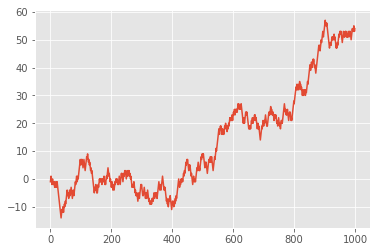

In [ ]:
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
plt.plot(random_walk)
plt.show()

A random walk is one in which future steps or directions cannot be predicted on the basis of past history, meaning that short-run changes in stock prices are unpredictable


A random walk is not simply a sequence of random numbers, rather follows the property that the next value in the sequence is a modification of the previous value in the sequence. Because of the dependence from one-time step to the next, there is some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides.

A simple model of a random walk is as follows:

1. Start with a random number of either -1 or 1.
2. Randomly select a -1 or 1 and add it to the observation from the previous time step.
3. Repeat step 2 for as long as you like.

More succinctly, we can describe this process as:

$$y(t) = B_0 + B_1*y_{t-1} + e(t) $$

The current observation is a random step from the previous observation.

Where y(t) is the next value in the series. B0 is a coefficient that if set to a value other than zero adds a constant drift to the random walk. B1 is a coefficient to weight the previous time step and is set to 1.0. X(t-1) is the observation at the previous time step. e(t) is the white noise or random fluctuation at that time.

**In Hindsight...**

People love rationalizing. To some, it's relieving to know that perhaps we don't live in a chaotic world (mathematically speaking to say the least). I remember watching the news the other day, when some company reported higher earnings per share than expected; so obviously my gullible self thought of buying. But little did I know that the market would go down despite those news. My cynicism towards the market kept growing. Some analysis showed that despite stronger quarterly earnings, the company was still, overall, poorly performing during that year, hence explaining the stock's down movement that day. And that is when I realized, that there is always going to be an explanation to what happened, because in hindsight, everything just makes sense. Whether the stock goes up or down, it would just make sense either way.

**On Self-Fulffiling Prophecy**

Maybe, just maybe, if people believe that history indeed repeats itself despite the fact that markets can be random, then perhaps the market will move the way they predicted (in this case according to how history behaved). If they believe they can draw lines of support and resistance, regardless whether they are swings, pivots, fibonaccis, and all that fancy talk; if they believe that price action will respect those lines and people's commonly shared ideas and conditions for reversion and breakouts; perhaps the market will indeed move that way, because afterall, it moves when people buy and sell. And when people think it will go up or down, it will do so. And that is, a market that fulfills its prophecy.

But why doesn't it consistently happen? Why does the market sometimes keep going despite the signs of reversal (and vice-versa)? Maybe because those conditions are so agreed upon, that players with more money to risk, will have gathered enough liquidity (from those common people) to trade the other way, just enough to trigger everyone's - yet again - "commonly agreed upon" stop losses (support, resistance), creating a cascading effect, while the bigger players end up profiting. The beauty of it all? Sometimes they let the market correctly react on our expectation, giving us just enough hope to keep believing, and keep going.

"seeks to predict future movements by seeking to interpret past patterns on the assumption that ‘history tends to repeat itself’

**On Confirmation Bias**

I would see people taking a trade that goes wrong, and they'd scour the internet for one analysis that shows them that maybe, the market would go their way, ignoring all the signs that the market could go the other way. I was one of them.

### Statistical Testing

#### Data Dredging



# Gathering Financial Data

First and foremost, we need to gather a data set representing the characteristics of the stock's price movement, specifically the open/high/low/close in a certain period, as well as the traded volume.

Then, we'll organize it in a way that is easy to work with (adding columns, merging columns from several data sets into one, etc.) so that we can finally gather what we need from that data set

## Importing Data

We can import data from Yahoo! Finance, then save it as an Excel file so that we can load it later on

In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from pandas_datareader import data
import os

def get(ticker, starttime, endtime): 
  # You can import data from Yahoo! Finance using pandas' data reader
  df= data.DataReader(ticker, 'yahoo') 
  if not os.path.exists('sectionI'): os.makedirs('sectionI')
  # Now, we can convert it to a .csv file
  df.to_csv('sectionI/{}.csv'.format(ticker))
  # Now, you can load in the data set from Excel (.csv)
  df = pd.read_csv('sectionI/{}.csv'.format(ticker), index_col = 'Date', parse_dates=True)
  return df

starttime = datetime.datetime(2006, 10, 1)
endtime = datetime.datetime(2012, 1, 1)
df = get('AAPL', starttime, endtime)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-27,123.610001,122.120003,123.089996,122.769997,44455500.0,113.145889
2015-07-28,123.910004,122.550003,123.379997,123.379997,33618100.0,113.708076
2015-07-29,123.500000,122.269997,123.150002,122.989998,37011700.0,113.348640
2015-07-30,122.570000,121.709999,122.320000,122.370003,33628300.0,112.777275
2015-07-31,122.639999,120.910004,122.599998,121.300003,42885000.0,111.791130


In [ ]:
# Can gather data from many tickers
from pandas_datareader import data

def get(tickers, startdate, enddate):
    def singlepass(ticker):
        return (data.DataReader(ticker, 'yahoo',start = startdate, end = enddate))
    datas = map (singlepass, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
print(all_data)

                         High         Low  ...       Volume   Adj Close
Ticker Date                                ...                         
AAPL   2006-10-02   10.838572   10.614285  ...  178159800.0    9.283074
       2006-10-03   10.707143   10.455714  ...  197677200.0    9.186352
       2006-10-04   10.780000   10.451428  ...  207270700.0    9.347562
       2006-10-05   10.880000   10.590000  ...  170970800.0    9.279355
       2006-10-06   10.720000   10.544286  ...  116739700.0    9.203714
...                       ...         ...  ...          ...         ...
GOOG   2011-12-23  316.154968  314.102661  ...    2918200.0  315.387848
       2011-12-27  321.041656  314.819977  ...    3224800.0  318.929565
       2011-12-28  321.295715  317.858582  ...    4270200.0  318.655609
       2011-12-29  320.299438  316.414001  ...    3162500.0  320.000549
       2011-12-30  322.172424  319.811279  ...    3577800.0  321.744019

[5292 rows x 6 columns]


### Application: Import S&P 500 Data

We want to get a list of the companies in the S&P 500 index. We're going to use the HTML parsing library, Beautiful Soup, to parse Wikipedia's table of S&P 500 Companies

In [ ]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.strip()
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
    
    return tickers

print(save_sp500_tickers())

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'T', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DH

Now that we have the list of companies in the S&P 500, we're going to pull stock pricing data on all of them.

In [ ]:
import datetime as dt
import os
import pandas_datareader.data as web
import pickle

def get_data_from_yahoo(start_date, reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    # Getting only the first 100 (don't want to ruin my wifi bandwidth)
    for ticker in tickers[:50]:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = data.DataReader(ticker, 'yahoo',start=start_date) 
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


get_data_from_yahoo('1/1/2010')

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT


## Organizing Data

In [ ]:
# Drop a column

# Rename a column

# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

### Application: Compile S&P 500 Data

Now we want to compile the data (adjusted close) of each csv file into one dataframe 

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

with open("sp500tickers.pickle","rb") as f: tickers = pickle.load(f)
main_df = pd.DataFrame()


for stock in tickers[:50]:
  df = pd.read_csv('stock_dfs/{}.csv'.format(stock), index_col = 'Date').filter(['Adj Close'])
  df.rename(columns={'Adj Close':stock}, inplace = True)
  if main_df.empty : main_df = df 
  else : main_df = main_df.join(df, how='outer')
main_df.to_csv('sp500_joined_closes.csv')
main_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AIV,AAPL,AMAT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,64.094299,18.306808,NaN,8.74,34.002178,10.193225,37.090000,9.70,39.404591,10.855136,15.137810,20.488514,57.951920,25.920000,7.727966,32.623764,46.764862,24.125000,18.50,NaN,37.828434,63.271015,10.548290,24.504675,313.688690,312.204773,11.947873,133.899994,NaN,18.415007,4.513494,23.393200,35.126514,21.957905,37.498001,17.487123,31.593315,22.914034,15.915971,47.286503,20.822670,24.388929,44.639999,51.784992,33.655460,5.172473,90.442230,11.917636,26.601469,11.637470
2010-01-05,63.692837,18.158911,NaN,8.53,34.212315,10.211267,37.700001,9.71,39.170380,10.743966,15.576957,20.265959,57.471073,26.690001,8.151261,32.563816,46.271824,23.780001,18.01,NaN,37.452881,63.395855,10.795052,24.907579,312.307312,310.829926,11.953911,134.690002,NaN,18.342035,5.024457,23.125393,35.049255,21.546516,38.119232,17.664690,32.330067,22.750559,15.845874,46.876877,20.387550,24.350426,43.639999,52.348339,33.442551,5.106382,91.510094,12.216322,26.647457,11.547951
2010-01-06,64.596115,18.259748,NaN,8.40,34.576019,10.157144,37.619999,9.57,39.511925,10.632796,15.713790,20.193951,56.997208,26.469999,8.078128,32.623764,46.028984,23.840000,17.48,NaN,37.574924,63.712730,10.878465,24.915632,304.434448,302.994293,12.128994,132.250000,NaN,18.215996,4.816288,23.359728,35.615814,21.406933,38.317680,17.757339,32.781635,22.535437,15.862366,46.524590,20.464598,24.304222,43.349998,53.197708,33.433685,5.108703,92.945274,12.432871,26.223597,11.523536
2010-01-07,64.642426,18.411020,NaN,8.40,34.543690,9.913588,36.889999,9.47,39.502171,10.640736,15.882447,20.167767,56.669670,26.480000,8.036019,32.392517,46.455803,23.930000,17.43,NaN,37.274479,64.298485,10.937549,25.044571,297.347351,295.940735,12.110883,130.000000,NaN,18.043520,4.958220,23.560587,36.193455,20.995548,38.214134,17.795948,33.027206,22.174040,15.903601,46.098595,20.328613,24.111700,43.459999,55.173756,33.336117,5.123775,91.535713,12.888368,26.175119,11.401463
2010-01-08,65.097923,18.505142,NaN,8.23,34.406292,9.832404,36.689999,9.43,39.658298,10.942485,15.723335,20.161219,57.032036,26.480000,7.876450,32.880722,46.301262,23.975000,17.66,NaN,37.002193,64.989861,11.149558,25.149324,301.311310,299.885956,12.141068,133.520004,NaN,17.917480,4.863598,23.841785,36.167606,21.553860,38.291798,17.757339,33.146030,22.414972,16.212849,46.508213,20.478193,24.250319,43.759998,55.416428,33.611099,5.199142,91.057327,12.589680,26.349140,11.840925


## Getting Subsets of Data

Now that we have a large dataset, some operations to select the data you need can come in useful

In [ ]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

# Analyzing Data

## Quantitative Analysis

### Stock Returns

In [ ]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print("Daily Returns \n {}".format(daily_pct_c[:10]))

Daily Returns 
             Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189


In [ ]:
# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print("Daily Log Returns \n {}".format(daily_log_returns[:10]))

Daily Log Returns 
             Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008185
2006-10-09   0.005509
2006-10-10  -0.011048
2006-10-11  -0.007889
2006-10-12   0.027344
2006-10-13  -0.003194


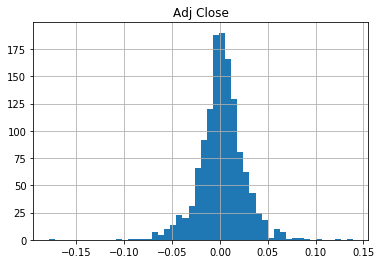

         Adj Close
count  1323.000000
mean      0.001565
std       0.023983
min      -0.179195
25%      -0.010661
50%       0.001646
75%       0.014285
max       0.139050


In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

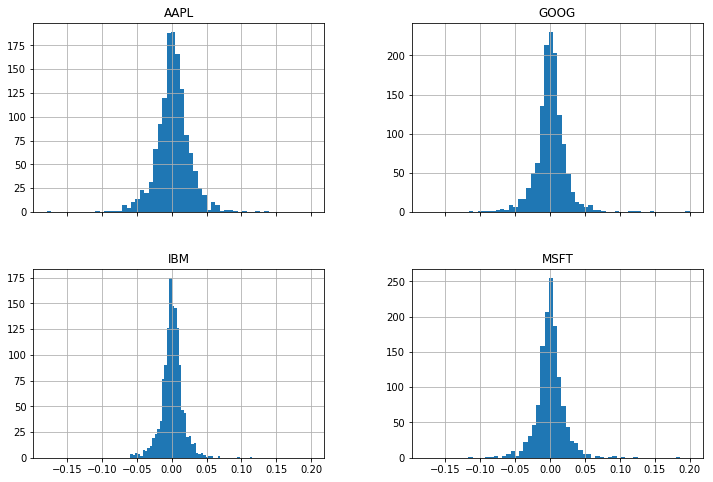

In [ ]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

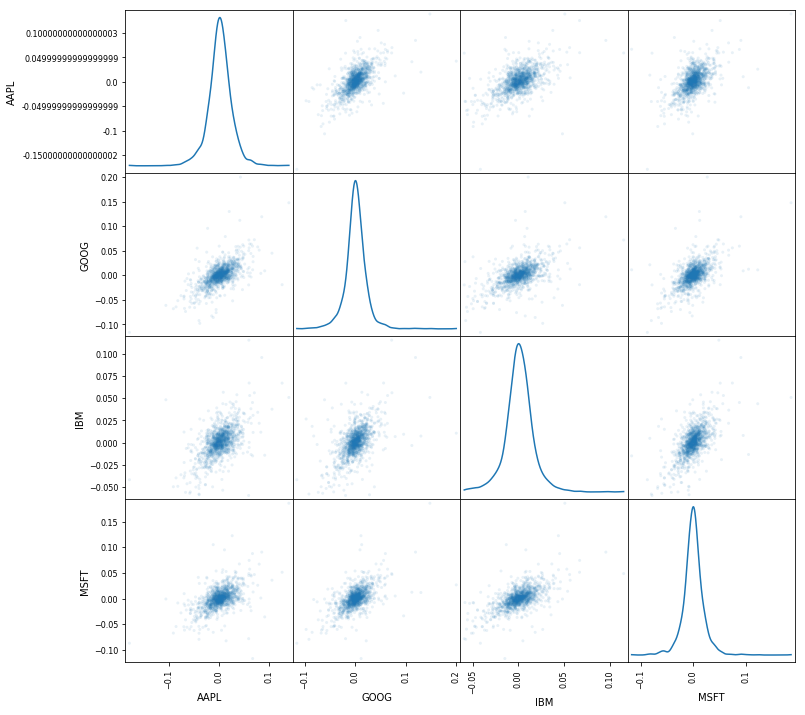

In [ ]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [ ]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.126451,0.121460,0.125777,0.122860,0.369611,0.122860
2007-06-30,0.195413,0.198331,0.196030,0.197735,-0.080296,0.197735
2007-10-31,0.404613,0.392010,0.400961,0.400796,0.306882,0.400796
2008-02-29,0.130711,0.117746,0.127066,0.120394,0.172293,0.120394
2008-06-30,-0.004290,0.005927,-0.003550,0.003673,-0.209762,0.003673
2008-10-31,-0.108879,-0.124618,-0.114267,-0.118803,0.133219,-0.118803
2009-02-28,-0.363388,-0.359305,-0.363639,-0.360865,-0.161601,-0.360865
2009-06-30,0.304359,0.324702,0.312134,0.316588,-0.386935,0.316588


In [ ]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c[:10])

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017548
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189


In [ ]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return[:10])

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999600
2006-10-06   0.991451
2006-10-09   0.996928
2006-10-10   0.985974
2006-10-11   0.978226
2006-10-12   1.005343
2006-10-13   1.002137


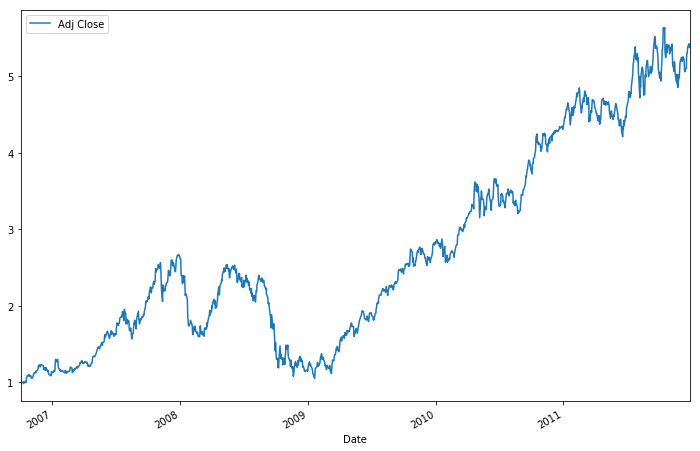

In [ ]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [ ]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return[:10])

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
2007-03-31   1.210302
2007-04-30   1.251737
2007-05-31   1.453453
2007-06-30   1.625638
2007-07-31   1.818073


### Variance


Markets, and specifically their returns, are volatile (granted, some more than others), making prices move unpredictably. In most cases, the higher the volatility, the higher the uncertainty, and the riskier the security (imagine price moving inside a band of size proportional to the variance).

This leads us to the concept of **risk**. Essentially, risk is the possibiliity of losing something of value (in this case, financial wealth). It is a consequence of an action taken in spite of uncertainty, leading to an unpredictable (and uncontrollable) outcome.

#### Volatility


**Volatility** measures the dispersion of returns for a given security or market index, by using the standard deviation or variance between returns from that same security or market index. 

Volatility refers to the amount of uncertainty or risk related to the size of changes in a security's value. 

* A higher volatility means that a security's value can potentially be spread out over a larger range of values. This means that the price of the security can change dramatically over a short time period in either direction. 
* A lower volatility means that a security's value does not fluctuate dramatically, and tends to be more steady.

In the securities markets, volatility is often associated with big swings in either direction. For example, when the stock market rises and falls more than one percent over a sustained period of time, it is called a "volatile" market.

Below, we're calculating the volatility of returns of individual stocks. This concept will be later applied to an entire portfolio of stocks

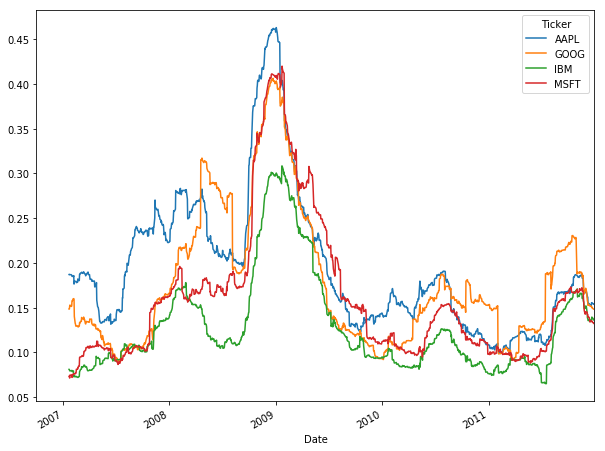

In [ ]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

#### Correlation

**Covariance** is a measure of the joint variability of two random variables.  
* If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. 
* In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative.

The covariance between two jointly distributed real-valued random variables {\displaystyle X} X and {\displaystyle Y} Y with finite second moments is defined as the expected product of their deviations from their individual expected values: $$cov(X, Y) = E[(X - E[X])(Y-E[Y])]$$, where $E[X]$ is the expected value of X.

The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

Given a pair of random variables $(X, Y)$, **Pearson's correlation coefficient** is $$ \rho_{X, Y} = \frac {cov(X, Y)}{\sigma_X \sigma_Y} $$
where $cov$ is the covariance, $\sigma_X$ is the standard deviation of X, and $\sigma_Y$ is the standard deviation of Y

![Examples of scatter diagrams with different values of correlation coefficient (ρ)](https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png)

#### Application: S&P 500 Correlation Heat-Map


           MMM       ABT      ABBV  ...       AIV      AAPL      AMAT
MMM   1.000000  0.480200  0.355487  ...  0.432720  0.416230  0.489020
ABT   0.480200  1.000000  0.431674  ...  0.331370  0.341735  0.398367
ABBV  0.355487  0.431674  1.000000  ...  0.244719  0.225424  0.285279
ABMD  0.292967  0.333326  0.223610  ...  0.228370  0.262963  0.300560
ACN   0.538737  0.480664  0.326715  ...  0.408495  0.393069  0.463382

[5 rows x 50 columns]


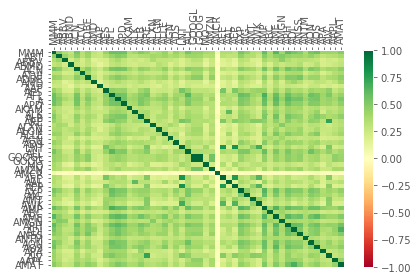

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df.set_index('Date', inplace=True) 
    df_corr = df.pct_change().corr() # build correlation table
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    '''
    We need the actual data itself to graph. This gives us
    numpy array of just the values, which are the correlation numbers
    '''
    data1 = df_corr.values 
    
    # Build figure and axis
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    '''
    Create a heatmap, made of a range of colors, which can be a range of
    anything to anything , and the color scale is generated from the cmap that 
    we use. We're going to use RdYlGn, which is a colormap that goes from red 
    on the low side, yellow for the middle, and green for the higher part of the 
    scale, which will give us red for negative correlations, green for positive 
    correlations, and yellow for no-correlations. We'll add a side-bar that is a 
    colorbar as a sort of "scale" for us:
    ''' 
    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    
    # we're going to set our x and y axis tick markers so we know which companies 
    # are which, since right now we've only just plotted the data:
    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    
    '''
    This will flip our yaxis, so that the graph is a little easier to read, since 
    there will be some space between the x's and y's. Generally matplotlib leaves 
    room on the extreme ends of your graph since this tends to make graphs easier
    to read, but, in our case, it doesn't. Then we also flip the xaxis to be at the 
    top of the graph, rather than the traditional bottom, again to just make this more 
    like a correlation table should be.
    '''
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    
    '''
    Now we're actually going to add the company names to the currently-nameless ticks. 
    In this case, we could have used the exact same list from both sides, since 
    column_labels and row_lables should be identical lists. This wont always be true 
    for all heatmaps, however, so I decided to show this as the proper method for just 
    about any heatmap from a dataframe. 
    '''
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    
    '''
    We rotate the xticks, which are the actual tickers themselves, since normally they'll be 
    written out horizontally. We've got over 500 labels here, so we're going to rotate them 90 
    degrees so they're vertical. It's still a graph that's going to be far too large to really 
    see everything zoomed out, but that's fine. The line that says heatmap1.set_clim(-1,1) just 
    tells the colormap that our range is going to be from -1 to positive 1. It should already be 
    the case, but we want to be certain. Without this line, it should still be the min and max of 
    your dataset, so it would have been pretty close anyway.
    '''
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


visualize_data()


#### Application: OLS Regression between Asset Pair




In [ ]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'].values)

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.33e-96
Time:                        19:05:57   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

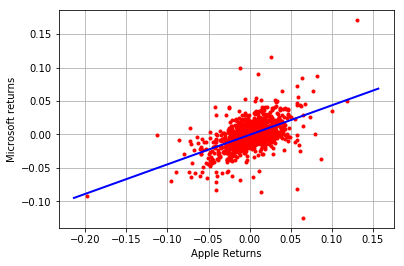

In [ ]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

# params[0] is const coef (y-axis intersection), and params[1] is AAPL coeff (correlation coefficient)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

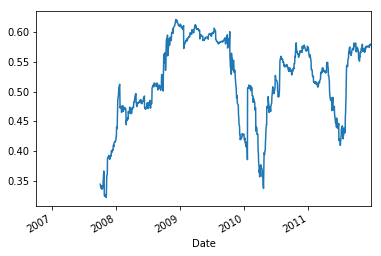

In [ ]:

return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

#### Beta

One measure of the relative volatility of a particular stock to the market is its **beta**. A beta approximates the overall volatility of a security's returns against the returns of a relevant benchmark (usually the S&P 500 is used). 

For example, a stock with a beta value of 1.1 has historically moved 110% for every 100% move in the benchmark, based on price level. Conversely, a stock with a beta of .9 has historically moved 90% for every 100% move in the underlying index.

Beta measures the exposure (or sensitivity) of an asset to systematic (non-diversifiable) risk. It is the sensitivity of the expected excess asset returns to the expected excess market returns. 

$$\beta_i = \frac{cov(R_i, R_m)} {\sigma^2_{R_m}}$$

The beta of a potential investment is a measure of how much risk the investment will add to a portfolio that looks like the market. If a stock is riskier than the market, it will have a beta greater than one. If a stock has a beta of less than one, the formula assumes it will reduce the risk of a portfolio.

Beta is the coefficient of a regression of a security on a market portfolio.

It indicates the degree to which asset's return is correlated with broader market outcomes.
1. Betas exceeding one signify more than average "riskiness"; 
2. Betas below one indicate lower than average.
3. Since beta reflects asset-specific sensitivity to non-diversifiable, i.e. market risk, the market as a whole, by definition, has a beta of one

R-squared measures how closely each change in the price of an asset is correlated to a benchmark. Beta measures how large those price changes are in relation to a benchmark

In [ ]:
import statsmodels.api as sm
from datetime import datetime
import pandas_datareader.data as web

# By default, Beta on Yahoo! Finance is calculated from monthly adjusted closes over a period of 3 Years
def regression_on_market(stock, lookback_period, resample_size):
  start_date = datetime(datetime.now().year - lookback_period, datetime.now().month, datetime.now().day)
  data = web.DataReader([stock, '^GSPC'],data_source='yahoo',start= start_date)['Adj Close']

  # calculate monthly returns
  period_returns = data.resample(resample_size).apply(lambda x : x[-1]).pct_change()
  clean_period_returns = period_returns.dropna(axis=0) 
  # split dependent and independent variable
  X = clean_period_returns['^GSPC']
  y = clean_period_returns['AAPL']

  # Add a constant to the independent value
  X1 = sm.add_constant(X.values)

  # make regression model 
  model = sm.OLS(y, X1)

  # fit model and print results
  results = model.fit()
  print(results.summary())
  return round(results.params[1], 3)

print("{} Beta on Yahoo! Finance, calculated using 3 years' worth of monthly returns is {}".format(stock, regression_on_market(stock, 3, 'BM')))
print("{} Beta on Market Chameleon, calculated using 1 year's worth of weekly returns is {}".format(stock, regression_on_market(stock, 1, "W-MON")))

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     10.27
Date:                Sat, 27 Jul 2019   Prob (F-statistic):            0.00294
Time:                        21:40:09   Log-Likelihood:                 46.122
No. Observations:                  36   AIC:                            -88.24
Df Residuals:                      34   BIC:                            -85.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.012      1.100      0.2

### Distribution of Price Changes

#### Gaussian Distribution

##### Skewness

##### Kurtosis

## Technical Analysis

### Moving Averages

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def technical_chart(stock_symbol, start = datetime.datetime(2016, 2, 2), end = datetime.datetime(2018, 2, 2)):
  if not os.path.exists('stock_dfs/{}.csv'.format(stock_symbol)):
    df = get(stock_symbol, start, end)
  
  # Long moving window rolling mean
  df['252ma'] = df['Adj Close'].rolling(window = 252, min_periods = 0).mean()
  
  # Short moving window rolling mean
  df['42ma'] = df['Adj Close'].rolling(window = 42, min_periods = 0).mean()
  
  # Plot the adjusted closing price, the short and long windows of rolling means
  # df[['Adj Close', '42ma', '252ma']].plot()

  ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
  ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
  ax1.plot(df.index, df['Adj Close'])
  ax1.plot(df.index, df['252ma'])
  ax1.plot(df.index, df['42ma'])

  ax2.bar(df.index, df['Volume'])
  plt.show()
  
technical_chart('AAPL')

A more common way to visualize stock data is by using candlesticks, which depict the highest, lowest, open, and close price for a certain period

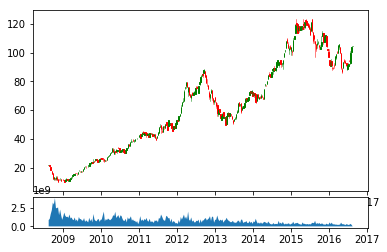

In [ ]:
# !pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

def candlestick_chart(stock_symbol):
  start = datetime(2008, 8, 15)
  end = datetime(2016, 8, 15)
  if not os.path.exists('{}.csv'.format(stock_symbol)):
 
    df = get(stock_symbol, start, end)
  else:
    df = pd.read_csv(stock_symbol+'.csv', parse_dates=True, index_col=0)      
  
  df_ohlc = df['Adj Close'].resample('10D').ohlc()
  df_volume = df['Volume'].resample('10D').sum()
  df_ohlc.reset_index(inplace=True)
  df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
  ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
  ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
  ax1.xaxis_date()
  candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
  ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
  plt.show()


candlestick_chart("AAPL")

### Momentum Indicators

## Fundamental Analysis

Merrill Lynch: https://e145.stanford.edu/upload/Merrill_Lynch.pdf

Financial Ratios: https://www.wallstreetmojo.com/financial-ratios/

### Reading a Financial Report

#### Letter to Shareholders

#### Business Review

#### Financial Review

##### Management Discussion & Analysis

##### Audited Financial Statements

### Financial Ratios

* **Market Cap**: Stands for market capitalization

* **Beta**: Explained [later](https://)

* **EPS Ratio**: Stands for Earnings Per Share

* **PE Ratio**: Stands for Price to Earnings  

* **Dividend Yield**:

* Dividend:

#### Scraping Financial Data

Using Beautiful Soup again to scrape useful data from Yahoo! Finance summary page of a stock. 

In [ ]:
import bs4 as bs
import requests
def scrape_financial_data(ticker):
    resp = requests.get('https://finance.yahoo.com/quote/{}?p={}'.format(ticker, ticker))
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'W(100%) M(0) Bdcl(c)'})
    data = {}
    for row in table.findAll('tr'):
        key = row.findAll('td')[0].text.strip()
        value = row.findAll('td')[1].text.strip()
        data.update({key:value})
    return data
financial_data = scrape_financial_data('AAPL')
print(financial_data)

{'Market Cap': '1.077T', 'Beta (5Y Monthly)': '1.29', 'PE Ratio (TTM)': '19.56', 'EPS (TTM)': '12.60', 'Earnings Date': 'Apr 27, 2020 - May 03, 2020', 'Forward Dividend & Yield': '3.08 (1.25%)', 'Ex-Dividend Date': 'Feb 06, 2020', '1y Target Est': '322.17'}


Let's make a dataframe where rows represent the companies of the S&P 500, and columns represent the financial data fetched above. 

In [ ]:
keys = list(scrape_financial_data('AAPL').keys())
stocks = save_sp500_tickers()[:10]
dictio = { stock : scrape_financial_data(stock) for stock in stocks }
df = pd.DataFrame(dictio).T
df

KeyboardInterrupt: ignored

Now we have the data we need to fundamentally analyze a company. 

Several value investing strategies have been devised to assess a company's financial strength, among which **Graham's 10 Rules**, **Piotroski F-Score**, and **Magic Formula Investing**. From those strategies, we can pick stocks that fit the outlined criteria. We call them **value stocks** 

In [ ]:
import pandas as pd
import requests
import json
def financialratios(quote):
    fr = requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{quote}")
    fr = fr.json()
    
    valuation = fr['ratios'][0]['investmentValuationRatios']
    print(valuation)
    profitability = fr['ratios'][0]['profitabilityIndicatorRatios']
    operating = fr['ratios'][0]['operatingPerformanceRatios']
    liquidity = fr['ratios'][0]['liquidityMeasurementRatios']
    debt = fr['ratios'][0]['debtRatios']
    
    valuation = pd.DataFrame(list(valuation.items()),columns=['Ratio', quote])
    profitability = pd.DataFrame(list(profitability.items()),columns=['Ratio', quote])
    operating = pd.DataFrame(list(operating.items()),columns=['Ratio', quote])
    liquidity = pd.DataFrame(list(liquidity.items()),columns=['Ratio', quote])
    debt = pd.DataFrame(list(debt.items()),columns=['Ratio', quote])

    frames = [valuation,profitability,operating,liquidity,debt]
    result = pd.concat(frames)
    return result

listofstocks = ['AAPL','MSFT','FB','TSLA']
x = financialratios('GOOGL')
for item in listofstocks:
    y = financialratios(item)
    x = x.merge(y,on='Ratio')

x.head()

{'priceBookValueRatio': '2.2180341220798043', 'priceToBookRatio': '2.2180341220798043', 'priceToSalesRatio': '2.7604937050606395', 'priceEarningsRatio': '13.010081519378039', 'receivablesTurnover': '6.390942114822712', 'priceToFreeCashFlowsRatio': '14.426101950794264', 'priceToOperatingCashFlowsRatio': '8.195253661408657', 'priceCashFlowRatio': '8.195253661408657', 'priceEarningsToGrowthRatio': '0.1467388707079069', 'priceSalesRatio': '2.7604937050606395', 'dividendYield': '', 'enterpriseValueMultiple': '9.415353160479874', 'priceFairValue': '2.2180341220798043'}
{'priceBookValueRatio': '10.666314697418441', 'priceToBookRatio': '10.666314697418441', 'priceToSalesRatio': '3.709723048190826', 'priceEarningsRatio': '17.46730643441436', 'receivablesTurnover': '11.34842536857716', 'priceToFreeCashFlowsRatio': '16.38775951405868', 'priceToOperatingCashFlowsRatio': '13.909202696891526', 'priceCashFlowRatio': '13.909202696891526', 'priceEarningsToGrowthRatio': '1.3549431647588217', 'priceSales

,Ratio,GOOGL,AAPL,MSFT,FB,TSLA
0,priceBookValueRatio,2.2180341220798043,10.666314697418441,9.27388488224372,5.63999247926851,12.416918533170108
1,priceToBookRatio,2.2180341220798043,10.666314697418441,9.27388488224372,5.63999247926851,12.416918533170108
2,priceToSalesRatio,2.7604937050606395,3.709723048190826,7.541115834810041,8.061781970946434,2.8484573814557463
3,priceEarningsRatio,13.010081519378039,17.46730643441436,24.18441997961264,30.832772518258047,-62.62890165978377
4,receivablesTurnover,6.390942114822712,11.34842536857716,4.262396694214876,7.427715906703089,22.61408903060203


In [ ]:
import pandas as pd
import requests
import json

def financialratios(quote):
    fr = requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{quote}")
    fr = fr.json()
    valuation = fr['ratios'][0]['investmentValuationRatios']
    ratios = [x[0] for x in valuation.items()]
    values = [x[1] for x in valuation.items()]
    valuation = pd.DataFrame(values, index = ratios, columns=[quote]).T
    return valuation

listofstocks = ['AAPL','MSFT','FB','TSLA']
x = map(financialratios, listofstocks)
pd.concat(x)

,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,receivablesTurnover,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
AAPL,10.666314697418441,10.666314697418441,3.709723048190826,17.46730643441436,11.34842536857716,16.38775951405868,13.909202696891526,13.909202696891526,1.3549431647588217,3.709723048190826,0.014628458229615355,13.31637596061561,10.666314697418441
MSFT,9.27388488224372,9.27388488224372,7.541115834810041,24.18441997961264,4.262396694214876,24.803884997386305,18.18523790361215,18.18523790361215,11.198301520944288,7.541115834810041,0.014553265436219036,18.48096923555572,9.27388488224372
FB,5.63999247926851,5.63999247926851,8.061781970946434,30.832772518258047,7.427715906703089,26.868932679615313,15.694878008481576,15.694878008481576,3.9795917495978865,8.061781970946434,,18.87808389679416,5.63999247926851
TSLA,12.416918533170108,12.416918533170108,2.8484573814557463,-62.62890165978377,22.61408903060203,-20921.11815537303,29.140742191112412,29.140742191112412,5.444984937052426,2.8484573814557463,-0,41.52477691963963,12.416918533170108


In [ ]:
import pandas as pd
import urllib as u
from bs4 import BeautifulSoup as bs


def get_ratios( symbol ):
    try:
      dict = {}
      ratios = ['Market Cap', ]
      url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
      html = u.request.urlopen(url).read()
      soup = bs(html, 'lxml')
      # Change the text below to get a diff metric
      pb =  soup.find(text = r'P/B')
      pb_ = pb.find_next(class_='snapshot-td2').text
      print( '{} price to book = {}'.format(symbol, pb_) )
      return pb_
    except Exception as e:
      print(e)
        
stock_list = ['XOM','AMZN','AAPL','SWKS']
p2b_series = pd.Series( index=stock_list )

for sym in stock_list:
	p2b_series[sym] = get_price2book(sym)

XOM price to book = 0.74
AMZN price to book = 14.63
AAPL price to book = 12.16
SWKS price to book = 2.88


In [ ]:
from yahoofinancials import YahooFinancials
from pprint import pprint
import pandas as pd
import os

ticker = 'AAPL'

if not os.path.exists('financials'):
    os.makedirs('financials')

# Now, we can convert it to a .csv file
if not os.path.exists('financials/{}.csv'.format(ticker)):
    yahoo_financials = YahooFinancials(ticker)
    dictionary = yahoo_financials.get_financial_stmts('annual', ['income', 'cash', 'balance'])
    # pprint(dictionary)
    # ['incomeStatementHistory'][ticker]
    main_df = pd.DataFrame()

    for key in dictionary:
        sub_df = pd.DataFrame()
        for i in range(len(dictionary[key][ticker])):
            statement = dictionary[key][ticker][i]
            df = pd.DataFrame(statement)
            if sub_df.empty:
                sub_df = df
            else:
                sub_df = sub_df.join(df, how='outer')
        main_df = pd.concat([main_df, sub_df])
    main_df.to_csv('financials/{}.csv'.format(ticker))

    main_df.describe()


### Graham's 10 Rules

1) An earnings-to-price yield of twice the triple-A bond. If the triple-A bond yield is, say 8%, then the required earnings yield is 16%. In reciprocal form, that's a price/earnings ratio of 6.25.

2) A P/E ratio down to four-tenth of the highest average P/E ratio the stock attained in the most recent five years. ( Average P/E ratio was defined as average stock price for a given year divided by the earnings for that year.)

3) A dividend yield of two-thirds the triple-A bond yield.

4) A stock price down to two-thirds of tangible book value per share.

5) A stock price down to two-thirds of "net current asset value" or "net quick liquidation value." This figure is defined as current assets less total debt. Fixed assets are not included.

6) Total debt less than tangible book value.

7) Current ratio ( current assets divided by current liabilities) of two or more.

8) Total debt equal or less than twice the net quick liquidation value as defined in No.5.

9) Earnings growth over the most recent ten years of 7% compounded - that is a doubling of earnings in a ten-year period.

10) Stability of growth in earnings, defined as no more then two declines of 5% or greater in year-end earnings (relative to the previous year) in the most recent ten years.

### Piotroski F-Score

[Original Paper](https://www.chicagobooth.edu/~/media/FE874EE65F624AAEBD0166B1974FD74D.pdf)

Number between 0-9 which is used to assess strength of company’s financial position. The score is calculated based on 9 criteria divided into 3 groups.

**Profitability:**

* *Return on Assets:* (1 point if it is positive in the current year, 0 otherwise)

* *Operating Cash Flow:* (1 point if it is positive in the current year, 0 otherwise)

* *Change in Return of Assets (ROA):* (1 point if ROA is higher in the current year compared to the previous one, 0 otherwise)

* *Accruals* (1 point if Operating Cash Flow/Total Assets is higher than ROA in the current year, 0 otherwise)

**Leverage, Liquidity and Source of Funds:**
* *Change in Leverage (long-term) ratio:* (1 point if the ratio is lower this year compared to the previous one, 0 otherwise)

* *Change in Current ratio:* (1 point if it is higher in the current year compared to the previous one, 0 otherwise)

* *Change in the number of shares:* (1 point if no new shares were issued during the last year)

**Operating Efficiency:**

* *Change in Gross Margin:* (1 point if it is higher in the current year compared to the previous one, 0 otherwise)

* *Change in Asset Turnover ratio:* (1 point if it is higher in the current year compared to the previous one, 0 otherwise)


Some adjustments that were done in calculation of the required financial ratios are discussed in the original paper.

The score is calculated based on the data from financial statement of a company. A company gets 1 point for each met criteria. Summing up of all achieved points gives Piotroski F-Score (number between 0-9).

A company that has Piotroski F-Score of 8-9 is considered to be strong. Alternatively, firms achieving the Score of 0-2 are considered to be weak.

Average value of Piotroski F-Score can be different in different branches of economy (e.g. manufacturing, finance, etc.) It should be taken into consideration while comparing companies with different specialization.

### Magic Formula Investing

Investment technique outlined by Joel Greenblatt in "The Little Book that Beats the Market" that uses the principles of value investing.

Greenblatt suggests purchasing 30 "good companies": cheap stocks with a high earnings yield and a high return on capital. Greenblatt claims that this strategy beats the S&P 500 96% of the time, and has averaged a 17-year annual return of 30.8%

1. Establish a minimum market capitalization (usually greater than $50 million).
2. Exclude utility and financial stocks.
3. Exclude foreign companies (American Depositary Receipts).
4. Determine company's earnings yield = EBIT / enterprise value.
5. Determine company's return on capital = EBIT / (net fixed assets + working capital).
6. Rank all companies above chosen market capitalization by highest earnings yield and highest return on capital (ranked as percentages).
7. Invest in 20–30 highest ranked companies, accumulating 2–3 positions per month over a 12-month period.
8. Re-balance portfolio once per year, selling losers one week before the year-mark and winners one week after the year mark.
9. Continue over a long-term (5–10+ year) period.

#### Liquidity Ratios

##### Current Ratio

##### Quick Ratio

##### Absolute Liquidity Ratio

##### Cash Ratio

#### Turnover Ratio

##### Inventory Turnover Ratio

##### Receivable Turnover Ratio

##### Capital Turnover Ratio

##### Asset Turnover Ratio

##### Net Working Capital Ratio

##### Cash Conversion Cycle

### Stock Screener

In this section, we will produce a stock screener

### Methods of Valuation

#### Disounted Cash Flow (DCF)

The fair value of a stock investment is the present value of future earnings (unlevered free cash flow). Captures the "intrinsic value" of the business


### Value Investing

VALUE CRITERIA #1: QUALITY RATING
Look for a quality rating that is average or better. You don’t need to find the best quality companies–average or better is fine. Benjamin Graham recommended using Standard & Poor’s rating system and required companies to have an S&P Earnings and Dividend Rating of B or better. The S&P rating system ranges from D to A+. Stick to stocks with ratings of B+ or better, just to be on the safe side.

VALUE CRITERIA #2: DEBT TO CURRENT ASSET RATIO
Benjamin Graham advised buying companies with Total Debt to Current Asset ratios of less than 1.10. In value investing it is important at all times to invest in companies with a low debt load. Total Debt to Current Asset ratios can be found in data supplied by Standard & Poor’s, Value Line, and many other services.

VALUE CRITERIA #3: CURRENT RATIO
Check the Current Ratio (current assets divided by current liabilities) to find companies with ratios over 1.50. This is a common ratio provided by many investment services.

VALUE CRITERIA #4: POSITIVE EARNINGS PER SHARE GROWTH
Criteria four is simple: Find companies with positive earnings per share growth during the past five years with no earnings deficits. Earnings need to be higher in the most recent year than five years ago. Avoiding companies with earnings deficits during the past five years will help you stay clear of high-risk companies.

VALUE CRITERIA #5: PRICE TO EARNINGS PER SHARE (P/E) RATIO
Invest in companies with price to earnings per share (P/E) ratios of 9.0 or less. Look for companies that are selling at bargain prices. Finding companies with low P/Es usually eliminates high growth companies, which should be evaluated using growth investing techniques.

VALUE CRITERIA #6: PRICE TO BOOK VALUE (P/BV)
Find companies with price to book value (P/BV) ratios less than 1.20. P/E ratios, mentioned in rule 5, can sometimes be misleading. P/BV ratios are calculated by dividing the current price by the most recent book value per share for a company. Book value provides a good indication of the underlying value of a company. Investing in stocks selling near or below their book value makes sense.

VALUE CRITERIA #7: DIVIDENDS
Invest in companies that are currently paying dividends. Investing in undervalued companies requires waiting for other investors to discover the bargains you have already found. Sometimes your wait period will be long and tedious, but if the company pays a decent dividend, you can sit back and collect dividends while you wait patiently for your stock to go from undervalued to overvalued.

# Stock Price Prediction

If we want to buy a particular stock, we may like to try to look into the future and attempt to predict what kind of returns we can expect with what kind of probability, or we may be interested in investigating what potential extreme outcomes we may experience and how exposed we are to the risk of ruin or, on the flip side, superior returns.



## Monte Carlo Simulation of a Random Walk


We will be using a Monte Carlo simulation (which relies on repeated random sampling) to look at the potential evolution of asset prices over time, assuming they are subject to daily returns that follow a normal distribution. This type of price evolution is also known as a “random walk”.

To set up our simulation, we need to estimate the expected level of return (mu) and volatility (vol) of the stock in question. This data can be estimated from historic prices, with the simplest methods just assuming past mean return and volatility levels will continue into the future. One could also adjust historic data to account for investor views or market regime changes etc, however to keep things simple and concentrate on the code we will just set simple return and volatility levels based on past price data.

It is useful to know that asset price returns usually follow a distribution that is more leptokurtic (fat tailed) than a normal distribution



In [ ]:
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data

apple = data.DataReader('AAPL', 'yahoo',start='1/1/2000') 
apple['Returns'] = apple['Adj Close'].pct_change()
days = (apple.index[-1] - apple.index[0]).days

annualised_return = round(apple['Returns'].mean() * 252,2)
annualised_stdev = round(apple['Returns'].std()*sqrt(252), 3)
cagr = ((((apple['Adj Close'][-1]) / apple['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR = {} %'.format(round(cagr,2)*100))
print ("Annual Volatility =",str(round(annualised_stdev,4)*100)+"%")

vol = annualised_stdev
mu = cagr

CAGR = 24.0 %
Annual Volatility = 40.6%


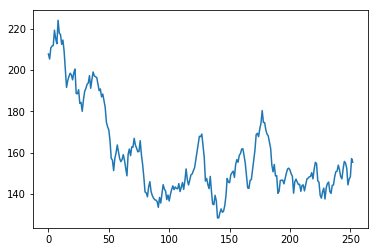

In [ ]:
#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)
    
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()

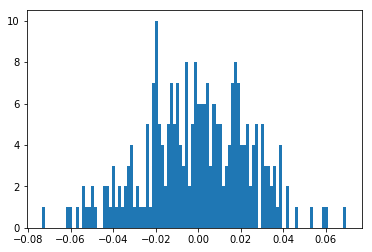

In [ ]:
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

The above code basically ran a single simulation of potential price series evolution over a trading year (252 days), based upon a draw of random daily returns that follow a normal distribution. This is represented by the single line series shown in the first chart. The second chart plots a histogram of those random daily returns over the year period.

So great – we have managed to successfully simulate a year’s worth of future daily price data. This is fantastic and all, but really it doesn’t afford us much insight into risk and return characteristics of the stock as we only have one randomly generated path. The likelyhood of the actual price evolving exactly as described in the above charts is pretty much zero.

So what’s the point of this simulation you may ask? Well, the real insight is gained from running thousands, tens of thousands or even hundreds of thousands of simulations, with each run producing a different series of potential price evolution based upon the same stock characteristics (mu and vol).

We can very simply adjust the above code to run multiple simulations. This code is presented below. In the below code you will notice a couple of things – firstly I have removed the histogram plot (we’ll come back to this in a slightly different way later), and also the code now plots multiple price series on one chart to show info for each separate run of the simulation. 

This give us the following plot of the 1000 different simulated price series

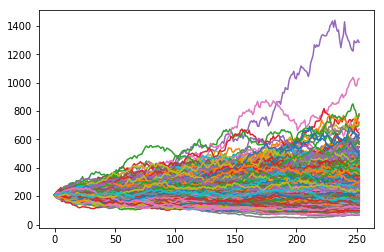

In [ ]:
import numpy as np

#set up empty list to hold our ending values for each simulated price series
result = []

#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
    
#show the plot of multiple price series created above
plt.show()

Now we can see the potential outcomes generated from 1000 different simulations, all based on the same basic inputs, allowing for the randomness of the daily return series. However, the spread of final prices is quite large.

In it’s current format, with the chart being so full of data it can be a little difficult to actually see clearly what is going on – so we use a histogram that will show us the distribution of ending simulation values, rather than the distribution of daily returns for an individual simulation.

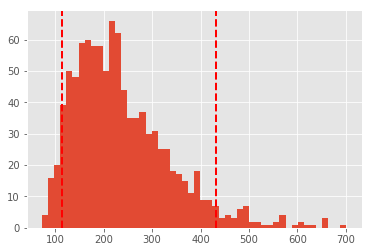

In [ ]:
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

We can now quickly calculate the mean of the distribution to get our “expected value”. You will get a slightly different result due to the fact that these are simulations of random daily return draws. The more paths or “runs” you include in each simulation, the more the mean value will tend towards the mean return we used as our “mu” input. This is as a result of the law of large numbers.

We can also take a look at a couple of “quantiles” of the potential price distribution, to get an idea of the likelyhood of very high or very low returns.

In [ ]:
print("The expected value is", round(np.mean(result),2))
print("There is a 5% chance that stock price will end up below around",round(np.percentile(result,5),2))
print("There is a 95% chance that stock price will end up below around",round(np.percentile(result,95),2))

The expected value is 237.43
There is a 5% chance that stock price will end up below around 113.81
There is a 95% chance that stock price will end up below around 432.15


## Geometric Brownian Motion 

Continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion (also called a Wiener process) with drift

A stochastic process $S_t$ is said to follow a GBM if it satisfies the following stochastic differential equation (SDE): $$ dS_t = \mu S_t dt + \sigma S_t dW_t $$ where $W_t$ is a Wiener process (or Brownian motion), and $\mu$ is the "percentage drift" (constant), and $\sigma$ is the "percentage volatility" (constant). The former is used to model deterministic trends, while the latter term is often used to model a set of unpredictable events occurring during this motion.

For an arbitrary initial value $S_0$ the above SDE has the analytic solution $$ S_t = S_0 * exp ((\mu - \frac{\sigma^2}{2}) * t + \sigma * W_t) $$





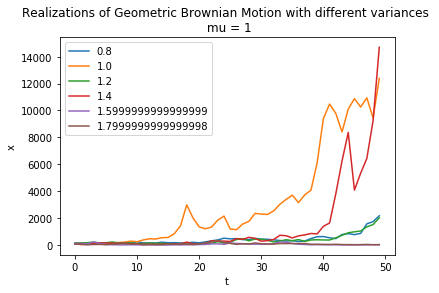

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gbm(mu, n, dt, x0):
  x = pd.DataFrame()
  np.random.seed(1)

  for sigma in np.arange(0.8, 2, 0.2):
    step = np.exp((mu-sigma**2/2)*dt)*np.exp(sigma*np.random.normal(0,np.sqrt(dt),(1,n)))
    temp = pd.DataFrame(x0 * step.cumprod())
    x = pd.concat([x, temp], axis = 1)

  x.columns = np.arange(0.8, 2, 0.2)
  plt.plot(x)
  plt.legend(x.columns)
  plt.xlabel('t')
  plt.ylabel('x')
  plt.title('Realizations of Geometric Brownian Motion with different variances \n mu = 1')
  plt.show()

gbm(1, 50, 0.1, 100)

Geometric Brownian motion is used to model stock prices in the Black–Scholes model and is the most widely used model of stock price behavior.

Some of the arguments for using GBM to model stock prices are:

* The expected returns of GBM are independent of the value of the process (stock price), which agrees with what we would expect in reality.
* A GBM process only assumes positive values, just like real stock prices.
* A GBM process shows the same kind of 'roughness' in its paths as we see in real stock prices.
* Calculations with GBM processes are relatively easy.

However, GBM is not a completely realistic model, in particular it falls short of reality in the following points:

* In real stock prices, volatility changes over time (possibly stochastically), but in GBM, volatility is assumed constant.
* In real life, stock prices often show jumps caused by unpredictable events or news, but in GBM, the path is continuous (no discontinuity).

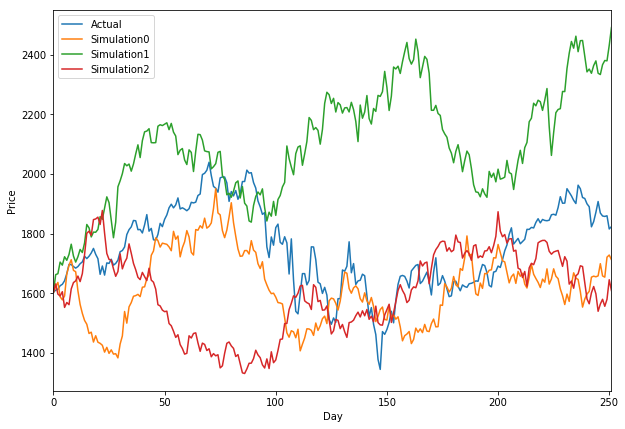

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

def gbm_stock(stock, sim_count):
  data = web.DataReader(stock,data_source='yahoo',start='01/01/2010')['Adj Close']
  # Take mean and stdev up to one year ago (we're predicting last year's values)
  mu = data.pct_change().iloc[:-252].mean()
  sigma = data.pct_change().iloc[:-252].std()
  
  # Dictionary
  simulation = {}
  # Save actual values of last year (for graphing)
  simulation['Actual'] = list(data.iloc[-252:].values)
  
  for sim in range(sim_count):
    # S0 for brownian
    simulation["Simulation" + str(sim)] = [data.iloc[-252]]
    for days in range(251):
      next_day = simulation["Simulation" + str(sim)][-1]*np.exp((mu-(sigma**2/2))+sigma*np.random.normal())
      simulation["Simulation" + str(sim)].append(next_day)
  
  simulation = pd.DataFrame(simulation)
  _ = simulation.plot(figsize = (10, 7))
  _.set_xlabel('Day')
  _.set_ylabel('Price')
  
  return simulation

sim_dict = gbm_stock('AMZN', 3)

## Machine Learning

# Portfolio Optimization


## Modern Portfolio Theory

A science has evolved around managing financial risk under the general title of **modern portfolio theory** (MPT) initiated by Dr. Harry Markowitz in 1952. In MPT, the variance (or standard deviation) of a portfolio return is used as the definition of risk.






The **risk-return tradeoff** states that the potential return rises (or decreases) with an increase (or decrease) in risk. Using this principle, individuals associate low levels of uncertainty with low potential returns, and high levels of uncertainty or risk with high potential returns. According to the risk-return tradeoff, invested money can render higher profits only if the investor will accept a higher possibility of losses.


### Types of Risk

There are two types of risk:
 
* **Unsystematic risk** is the uncertainty inherent in a company or industry investment. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, it is unique to a specific company or industry. Unsystematic risk can be reduced through diversification. Types of unsystematic risk include a new competitor in the marketplace with the potential to take significant market share from the company invested in, a regulatory change (which could drive down company sales), a shift in management, and/or a product recall. While investors may be able to anticipate some sources of unsystematic risk, it is impossible to be aware all or when/how these might occur. For example, an investor in healthcare stocks may be aware that a major shift in health policy is on the horizon, yet she/he cannot know in advance the particulars of the new laws and how companies and consumers will respond. The gradual adoption and then potential repeal of the Affordable Care Act, first written into law in 2010, has made it very challenging for some investors in healthcare stocks to anticipate and place confident bets on the direction of the industry and/or specific companies.

* **Systematic risk** is the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It incorporates interest rate changes, inflation, recessions and wars, among other major changes. Shifts in these domains can affect the entire market, and cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.


### Diversification

*Diversification: “the only free lunch in finance” - Harry Markowitz, 1952*

Under this theory, financial risk can be partially moderated by the means of **diversification**. The problem is to find the optimal allocation to each asset.

As the old adage says, *don't put all your eggs in one basket*. Dropping the basket will break all the eggs. Placing each egg in a different basket is more diversified. There is more risk of losing one egg, but less risk of losing all of them. On the other hand, having a lot of baskets may increase costs.

An example of an undiversified portfolio is to hold only one stock. This is risky; it is not unusual for a single stock to go down 50% in one year. It is less common for a portfolio of 20 stocks to go down that much, especially if they are selected at random. If the stocks are selected from a variety of industries, company sizes and asset types it is even less likely to experience a 50% drop since it will mitigate any trends in that industry, company class, or asset type.

In conclusion, if asset prices do not change in perfect synchrony (i.e. are uncorrelated), a diversified portfolio will have less variance than the weighted average variance of its constituent assets, and often less volatility than the least volatile of its constituents.

**Example of Diversification:** 

By owning a variety of company stocks across different industries, as well as by owning other types of securities in a variety of asset classes, such as Treasuries and municipal securities, investors will be less affected by single events. For example, an investor, who owned nothing but airline stocks, would face a high level of unsystematic risk. She would be vulnerable if airline industry employees decided to go on strike, for example. This event could sink airline stock prices, even temporarily. Simply the anticipation of this news could be disastrous for her portfolio. By adding uncorrelated holdings to her portfolio, such as stocks outside of the transportation industry, this investor would spread out air-travel-specific concerns. Unsystematic risk in this case affects not only specific airlines but also several of the industries, such as large food companies, with which many airlines do business. In this regard, she could diversify away from public equities altogether by adding US Treasury Bonds as an additional protection from fluctuations in stock prices.

### Ray Dalio's Holy Grail of Investing
Why can diversifying your investments in uncorrelated assets' returns, reduce overall portfolio risk?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

np.random.seed(123)

def gen_cov(n_assets=5, var=1, covar=0, var_vec=None, noise=0):
    X = np.random.randn(n_assets, n_assets) * noise + covar
    if var_vec is None:
        np.fill_diagonal(X, var)
    else:
        np.fill_diagonal(X, var_vec)
    return X

high_cov = gen_cov(covar=.2, n_assets=100, noise=.5, var=2.) #var_vec=[.5, 1, .5, 1, .7])
high_cov

array([[ 2.        ,  0.69867272,  0.34148925, ..., -0.48173577,
         0.38970031,  0.01041178],
       [ 0.52102734,  2.        ,  0.55613232, ...,  0.14457464,
         0.02936914,  0.09102687],
       [ 0.55165506, -0.09905267,  2.        , ...,  0.40784727,
         0.28027221,  0.6098803 ],
       ...,
       [ 0.52073604, -0.18274788, -0.50248741, ...,  2.        ,
        -0.00838426,  0.35348519],
       [ 0.3389352 ,  0.29415612,  1.89305726, ...,  0.18662773,
         2.        , -0.21095386],
       [-0.13422656, -0.87888077, -0.24093294, ..., -0.03613321,
         0.49098218,  2.        ]])

In [ ]:
gen_cov(covar=.0)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
covar = np.array([[ 1.2,  0.5,  0.,  0.,  0.5],
                  [ 0.5, .9,  0.,  0.,  0.],
                  [ 0.,  0.,  1.,  0.,  0.],
                  [ 0.,  0.,  0.,  1.,   1.],
                  [ 0.5,  0.,  0.,  1.,  1.]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


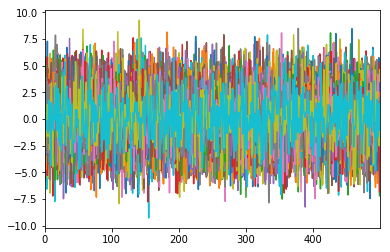

In [ ]:
def gen_returns(mean=0., cov=None, size=100, var=1, covar=0, n_assets=5):
    if cov is None:
        cov = gen_cov(var=var, covar=covar, n_assets=n_assets)
    if np.isscalar(mean):
        mean = np.ones((cov.shape[0],), np.float32) * mean
    
    return pd.DataFrame(np.random.multivariate_normal(mean, cov, size=size))
    
rets = gen_returns(cov=high_cov, size=500, mean=.1)
rets.plot(legend=False)

Text(0.5, 1.0, 'Correlated Brownian motion')

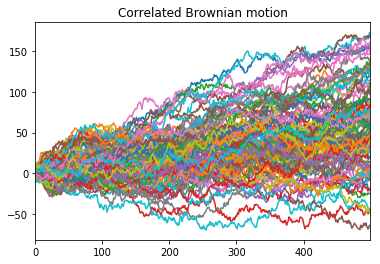

In [ ]:
rets.cumsum(axis=0).plot(legend=False)
plt.title('Correlated Brownian motion')

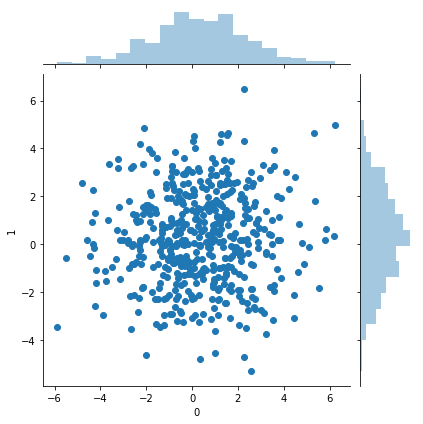

In [ ]:
sns.jointplot(rets[0], rets[1])

Text(0.5, 1.0, 'Simulating returns with varying levels of correlation')

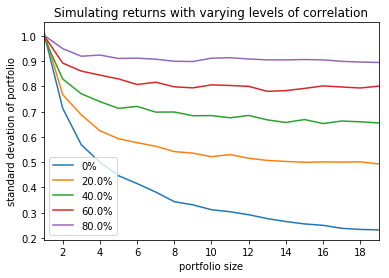

In [ ]:
def portfolio_returns(returns, w=None):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''
    n_assets = returns.shape[1]
    if w is None:
        # Assume equal weighting
        w = np.ones(n_assets, dtype=np.float32) / n_assets
        
    w = np.asmatrix(w)
    p = np.asmatrix(np.mean(returns, axis=0))
    C = np.asmatrix(np.cov(returns.T))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    return np.ravel(mu), np.ravel(sigma)

cov = [0, .2, .4, .6, .8]
asset_sizes = np.arange(1, 20)

x, y = np.meshgrid(cov, asset_sizes)

def _run_sim_std(covar, n_assets, mean=0., cov=None, size=100, var=1):
    rets = gen_returns(size=5000, var=1, covar=covar, n_assets=n_assets)
    return portfolio_returns(rets)[1]
    
run_sim_std = np.vectorize(_run_sim_std)

stds = run_sim_std(x, y)
stds = pd.DataFrame(stds, columns=[str(c*100)+'%' for c in cov], index=asset_sizes)
stds.plot()
plt.xlabel('portfolio size')
plt.ylabel('standard devation of portfolio')
plt.title('Simulating returns with varying levels of correlation')


Text(0.5, 1.0, 'Simulating returns with varying levels of correlation')

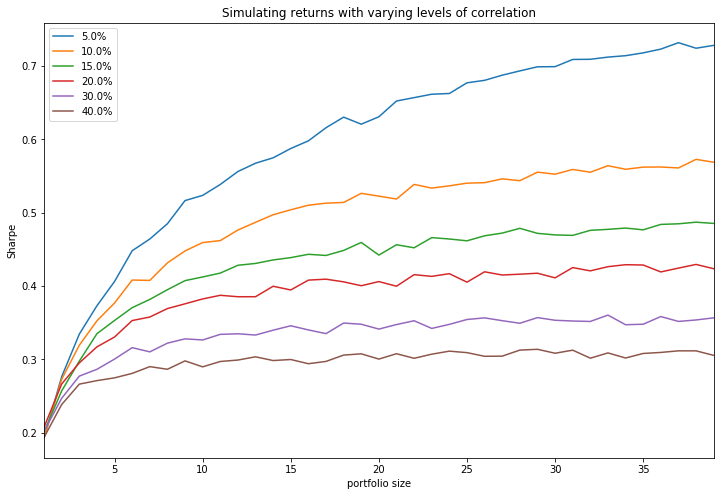

In [ ]:
cov = [.05, .1, .15, .2, .3, .4]#, .8]
asset_sizes = np.arange(1, 40)

x, y = np.meshgrid(cov, asset_sizes)

def _run_sim_sharpe(covar, n_assets, mean=0., cov=None, size=100, var=1):
    rets = gen_returns(size=50000, mean=.2, var=1, covar=covar, n_assets=n_assets)
    mu, sd = portfolio_returns(rets)
    return mu / sd
    
run_sim_sharpe = np.vectorize(_run_sim_sharpe)

sharpe = run_sim_sharpe(x, y)
sharpe = pd.DataFrame(sharpe, columns=[str(c*100)+'%' for c in cov], index=asset_sizes)
sharpe.plot(figsize=(12, 8))
plt.xlabel('portfolio size')
plt.ylabel('Sharpe')
plt.title('Simulating returns with varying levels of correlation')

### Mathematical Model

Under the model:
* Portfolio return is the proportion-weighted combination of the consituent assets' returns, specifically $$E(R_p) = \sum_i {w_i E(R_i)}$$ where $R_p$ is the return on the portfolio, $R_i$ is the return on asset $i$ and $w_i$ is the weighting of component asset $i$ (that is, the proportion of asset "i" in the portfolio)
* Portfolio return volatility (standard deviation) is a function of the correlations $\rho_{i, j}$ of the component assets, for all asset pairs $(i, j)$, specifically $$ \sigma_p = \sqrt{\sum_i \sum_j {w_i w_j \sigma_{ij}}} $$ where $ \sigma_{i, j} = \sigma_i \sigma_j \rho_{i, j}$ is the sample covariance of the periodic returns on the two assets, and $\rho_{i, j} = 1 $ for $ i = j $

    Returns  Volatility  Sharpe Ratio  STZ Weight  BA Weight  XOM Weight
0  0.147052    0.210539      0.603463    0.341565   0.244002    0.414433
1  0.143423    0.212678      0.580328    0.347365   0.057015    0.595620
2  0.152545    0.215949      0.613779    0.396668   0.257245    0.346086
3  0.138124    0.214572      0.550510    0.207330   0.411088    0.381583
4  0.142129    0.212706      0.574167    0.259452   0.370304    0.370244
The portfolio weight allocation that maximizes the Sharpe ratio is 
 Returns         0.160724
Volatility      0.226640
Sharpe Ratio    0.620913
STZ Weight      0.495984
BA Weight       0.204030
XOM Weight      0.299986
Name: 2528, dtype: float64
The portfolio weight allocation that minimizes the volatility is 
 Returns         0.136537
Volatility      0.206229
Sharpe Ratio    0.565086
STZ Weight      0.238422
BA Weight       0.208752
XOM Weight      0.552826
Name: 16995, dtype: float64


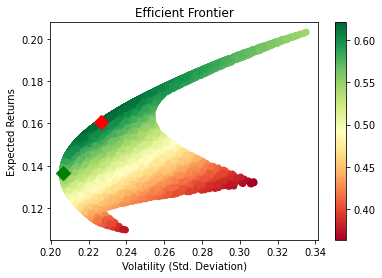

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime

def efficient_frontier(stocks, risk_free_rate, simulation_count, date=datetime(1993, 1, 1)):
  #download daily price data for each of the stocks in the portfolio
  data = web.DataReader(stocks,data_source='yahoo',start=date)['Adj Close']
  data.sort_index(inplace=True)

  #convert daily stock prices into daily returns
  returns_daily = data.pct_change()
  
  
  #calculate mean daily return and covariance of daily returns for each stock
  returns_annual = returns_daily.mean() * 252
  cov_daily = returns_daily.cov()
  cov_annual = cov_daily * 252

  #set number of runs of random portfolio weights
  num_portfolios = simulation_count

  # empty lists to store returns, volatility and weights of imiginary portfolios
  port_returns = []
  port_volatilities = []
  stock_weights = []
  sharpe_ratios = []

  for i in range(num_portfolios):
      #select random weights for portfolio holdings
      weights = np.array(np.random.random(len(stocks)))
      #rebalance weights to sum to 1
      weights /= np.sum(weights)

      #calculate portfolio return and volatility of the whole portfolio
      portfolio_return = np.sum(returns_annual * weights)
      portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_annual, weights)))
      sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

      port_returns.append(portfolio_return)
      port_volatilities.append(portfolio_std_dev)
      stock_weights.append(weights)
      sharpe_ratios.append(sharpe_ratio)

  # a dictionary for Returns and Risk values of each portfolio
  portfolio = {'Returns': port_returns,
               'Volatility': port_volatilities,
               'Sharpe Ratio': sharpe_ratios}

  # extend original dictionary to accomodate each ticker and weight in the portfolio
  for counter,symbol in enumerate(stocks):
      portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

  # make a nice dataframe of the extended dictionary
  results_frame = pd.DataFrame(portfolio)

  print(results_frame.head())
  #locate position of portfolio with highest Sharpe Ratio
  max_sharpe_port = results_frame.iloc[results_frame['Sharpe Ratio'].idxmax()]
  #locate positon of portfolio with minimum standard deviation
  min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]

  #create scatter plot coloured by Sharpe Ratio
  plt.scatter(results_frame['Volatility'],results_frame['Returns'],c=results_frame['Sharpe Ratio'],cmap='RdYlGn')

  # Draw Capital Allocation Line
  max_vol = results_frame.iloc[results_frame['Volatility'].idxmax()][1]
  slope = (max_sharpe_port[1] - 0.02) / (max_sharpe_port[0])
  x = np.linspace(0, max_vol, 100)
  y = slope*x + 0.02
  # plt.plot(x, y, '-r', label = 'CAL')
  plt.xlabel('Volatility (Std. Deviation)')
  plt.ylabel('Expected Returns')
  plt.title('Efficient Frontier')
  plt.colorbar()
  #plot red star to highlight position of portfolio with highest Sharpe Ratio
  plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker='D',color='r',s=100)
  #plot green star to highlight position of minimum variance portfolio
  plt.scatter(min_vol_port[1],min_vol_port[0],marker='D',color='g',s=100)

  print("The portfolio weight allocation that maximizes the Sharpe ratio is \n {}".format(max_sharpe_port))
  print("The portfolio weight allocation that minimizes the volatility is \n {}".format(min_vol_port))
  return max_sharpe_port

stocks = ['STZ','BA','XOM']
hi = efficient_frontier(stocks, 0.02, 50000)

## Capital Asset Pricing Model

### Mathematical Model


The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks, for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

The formula for calculating the expected return of an asset given its risk is as follows:

$$ E(R_i) = R_f + \beta_i (E(R_m) - R_f) $$ 
* First, investors expect to be compensated for risk and the time value of money. The risk-free rate in the CAPM formula accounts for the time value of money. 
* The other components of the CAPM formula account for the investor taking on additional risk (hence the '+')
* The Beta of a potential investment, which measures additional risk, is multiplied by $E(R_m) - R_f$, the **market risk premium**, which is the return expected from the market above the risk-free rate. 

The goal of the CAPM formula is to evaluate whether a stock is fairly valued when its risk and the time value of money are compared to its expected return.

For example, imagine an investor is contemplating a stock worth 100 dollars per share today that pays a 3% annual dividend. The stock has a beta compared to the market of 1.3, which means it is riskier than a market portfolio. Also, assume that the risk-free rate is 3% and this investor expects the market to rise in value by 8% per year. The expected return of the stock based on the CAPM formula is 3% + 1.3 * (8% - 3%) = 9.5%. The expected return of the CAPM formula is used to discount the expected dividends and capital appreciation of the stock over the expected holding period. If the discounted value of those future cash flows is equal to 100 dollars, then the CAPM formula indicates the stock is fairly valued relative to risk.



### CAPM and Efficient Frontier

Using the CAPM to build a portfolio is supposed to help an investor manage their risk. If an investor were able to use the CAPM to perfectly optimize a portfolio’s return relative to risk, it would exist on the efficient frontier of MPT

The **security market line** (SML) is the representation of the CAPM, specifically the investment's opportunity cost (investing in a combination of the market portfolio and the risk-free asset).  It displays the expected rate of return of an individual security as a function of systematic, non-diversifiable risk. The risk of an individual risky security reflects the volatility of the return from security rather than the return of the market portfolio. The risk in these individual risky securities reflects the systematic risk.
$$ SML: E(R_i) = R_f + \beta_i (E(R_m) - R_f) $$ 

All the correctly priced securities are plotted on the SML. The assets above the line are undervalued because for a given amount of risk (beta), they yield a higher return. The assets below the line are overvalued because for a given amount of risk, they yield a lower return.

All of the portfolios on the SML have the same Treynor ratio as does the market portfolio, i.e. $ \frac{E(R_i) - R_f}{\beta_i} = E(R_m) - R_f $. In fact, the slope of the SML is the Treynor ratio of the market portfolio since $\beta_m=1$.

A stock picking rule of thumb for assets with positive beta is to buy if the Treynor ratio will be above the SML and sell if it will be below. Indeed, from the efficient market hypothesis, it follows that we cannot beat the market. Therefore, all assets should have a Treynor ratio less than or equal to that of the market. In consequence, if there is an asset whose Treynor ratio will be bigger than the market's then this asset gives more return for unity of systematic risk (i.e. beta), which contradicts the efficient market hypothesis.

This abnormal extra return above the market's return at a given level of risk is what is called the alpha.


The **capital allocation line** (CAL) measure the risk of risky and risk-free assets. The graph displays the return to be made by taking on a certain level of risk. 
$$ CAL: E(R_C) = R_F + \frac {E(R_p) - R_F}{\sigma_P} \sigma_C$$

In this formula P is the risky portfolio, F is riskless portfolio, and C is a combination of portfolios P and F.

The slope of the capital allocation line is equal to the incremental return of the portfolio to the incremental increase of risk. Hence, the slope of the capital allocation line is called the reward-to-variability ratio because the expected return increases continually with the increase of risk as measured by the standard deviation.

The **capital market line**  (CML) represents portfolios that optimally combine risk and return. CML is a special case of the CAL where the risk portfolio is the market portfolio. Thus, the slope of the CML is the sharpe ratio of the market portfolio.
The intercept point of CML and efficient frontier would result in the most efficient portfolio called the tangency portfolio.
As a generalization, buy assets if sharpe ratio is above CML and sell if sharpe ratio is below CML.
So $$ CML: E(R_p) = R_f + \frac{E(R_m) - R_f}{\sigma_m} \sigma_p $$ where $R_p$ is the portfolio return, $R_f$ is the risk-free rate, $R_m$ is the market return, $\sigma_p$ is the standard deviation of portfolio returns, and $\sigma_m$ is the standard deviation of market returns

### Problems with CAPM

* Including beta in the formula assumes that risk can be measured by a stock’s price volatility. However, price movements in both directions are not equally risky. The look-back period to determine a stock’s volatility is not standard because stock returns (and risk) are not normally distributed.

* The CAPM also assumes that the risk-free rate will remain constant over the discounting period. Assume in the previous example that the interest rate on U.S. Treasury bonds rose to 5% or 6% during the 10-year holding period. An increase in the risk-free rate also increases the cost of the capital used in the investment and could make the stock look overvalued.

* The market portfolio that is used to find the market risk premium is only a theoretical value and is not an asset that can be purchased or invested in as an alternative to the stock. Most of the time, investors will use a major stock index, like the S&P 500, to substitute for the market, which is an imperfect comparison.

* The most serious critique of the CAPM is the assumption that future cash flows can be estimated for the discounting process. If an investor could estimate the future return of a stock with a high level of accuracy, the CAPM would not be necessary.

## Fama-French 3 Factor Model

The traditional asset pricing model, known formally as the capital asset pricing model (CAPM) uses only one variable to describe the returns of a portfolio or stock with the returns of the market as a whole. In contrast, the Fama–French model uses three variables. Fama and French started with the observation that two classes of stocks have tended to do better than the market as a whole: 

(i) small caps, as they tend to outperform large-cap stocks 

(ii) value stocks, as they tend to outperform growth stocks. Value stocks have higher book-to-market ratio compared to growth stocks. 

They then added two factors to CAPM to reflect a portfolio's exposure to these two classes: 

$$ r = R_f + \beta (R_m - R_f) + b_s * SMB + b_v * HML + \alpha $$

Here, the returns:

* $r$ is the portfolio's expected rate of return, 
* $R_f$ is the risk-free return rate,

* $R_m$ is the return of the market portfolio. 

* $r - R_f$ is the expected excess return

* $β$ is the "three factor" beta, which is analogous to the classical β but not equal to it (since there are now two additional factors to do some of the work)


Here, the factors:

* $R_m - R_f$ is the expected return on the market portfolio (index)

* $SMB$ stands for "Small [market capitalization] Minus Big"; it is the size premium, measuring the historic excess returns of small caps over big caps. SMB accounts for publicly traded companies with small market caps that generate higher returns, 
 
* $HML$ for "High [book-to-market ratio] Minus Low"; it is the value premium, measueing the historic excess returns of value stocks over growth stocks. HML accounts for value stocks with high book-to-market ratios that generate higher returns in comparison to the market.
 
These factors are calculated with combinations of portfolios composed by ranked stocks (BtM ranking, Cap ranking) and available historical market data. Historical values may be accessed on Kenneth French's web page. 

Moreover, once SMB and HML are defined, the corresponding coefficients bs and bv are determined by linear regressions and can take negative values as well as positive values.

As an evaluation tool, the performance of portfolios with a large number of small-cap or value stocks would be lower than the CAPM result, as the Three-Factor Model adjusts downward for observed small-cap and value stock out-performance.

There is a lot of debate about whether the outperformance tendency is due to market efficiency or market inefficiency. In support of market efficiency, the outperformance is generally explained by the excess risk that value and small-cap stocks face as a result of their higher cost of capital and greater business risk. In support of market inefficiency, the outperformance is explained by market participants incorrectly pricing the value of these companies, which provides the excess return in the long run as the value adjusts.

## Kelly Criterion

Suggests that the stake should be proportional to the perceived edge. Formula for bet sizing that leads almost surely to higher wealth compared to any other strategy in the long run (i.e. the limit as the number of bets goes to infinity). 


* We start with 1 unit of wealth and bet a fraction $x$ of that wealth on an outcome that occurs with probability $p$ and offers odds of $b$. 

* The probability of winning is $p$, and in that case the wealth is equal to $1 + x * b$. The probability of losing is $1-p$, and in that case the wealth is equal to $1-x$. Therefore our expectation value for log wealth ($E$) is $$ E = p * log (1 + x * b) + (1 - p) * log (1 - x) $$

The **Kelly bet size** is found by maximizing the expected logarithm of wealth which is equivalent to maximizing the expected geometric growth rate. To an individual with logarithmic utility, the Kelly bet maximizes expected utility. Therefore, one would set the derivative y'(x) of the expected value of the logarithmic bankroll y(x) to 0 and solve for x:


In [ ]:
from sympy import *
x, b, p = symbols('x b p')
y = p * log (1 + b * x) + (1 - p) * log (1 - x)
solve(diff(y, x), x)

[(b*p + p - 1)/b]

The Kelly criterion is therefore given by $$ x = \frac{pb + p - 1}{b} $$

In mathematical finance, a portfolio is called *growth optimal* if security weights maximize the expected geometric growth rate (which is equivalent to maximizing log wealth).

## Portfolio Simulation

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

d1 = datetime(2008, 8, 15)  # start date
split = datetime(2018, 5, 26)
d2 = datetime.today()   # end date
delta = d2-split
months_count = 12       # timedelta

def portfolio_simulation(initial_capital, stocks):
  data = web.DataReader(stocks,data_source='yahoo',start=d1)['Adj Close']
  monthly_returns = data.resample('BM').apply(lambda x: x[-1]).pct_change()

  dictio = {}
  dictio["Portfolio Value"] = [initial_capital]
  
  for i in range(months_count + 1):
      weight_list = []

      current_day = split + timedelta(days = i)
     
      arr = efficient_frontier(stocks, 0.02, 100, current_day)
      del arr['Returns']
      del arr['Volatility']
      del arr['Sharpe Ratio']
      
      for key in arr:
        weight_list.append(key)
      weights = np.asarray(weight_list)

#       port_change = np.dot(weights.T, monthly_returns.iloc[(-months_count+i)]) + 1
#       port_value = (dictio["Portfolio Value"][-1]) * port_change
#       dictio["Portfolio Value"].append(port_value)

#   simulation = pd.DataFrame(dictio)
#   _ = simulation.plot(figsize = (10, 7))
#   _.set_xlabel('Day')
#   _.set_ylabel('Price')

stocks = ['AAPL', 'FB', 'GOOG', 'AMZN', 'CSCO']
portfolio_simulation(10000, stocks)

Symbols         AAPL      AMZN      CSCO        FB      GOOG
Date                                                        
2008-08-29       NaN       NaN       NaN       NaN       NaN
2008-09-30 -0.329559 -0.099616 -0.061954       NaN -0.135488
2008-10-31 -0.053405 -0.213304 -0.212323       NaN -0.102766
2008-11-28 -0.138675 -0.254018 -0.069217       NaN -0.184773
2008-12-31 -0.078990  0.200937 -0.014511       NaN  0.050143
2009-01-30  0.056005  0.147036 -0.081595       NaN  0.100374
2009-02-27 -0.009098  0.101496 -0.026720       NaN -0.001595
2009-03-31  0.177024  0.133508  0.150995       NaN  0.029794
2009-04-30  0.197013  0.096405  0.152057       NaN  0.137649
2009-05-29  0.079313 -0.031421 -0.042443       NaN  0.053691
2009-06-30  0.048745  0.072702  0.008108       NaN  0.010450
2009-07-31  0.147160  0.025102  0.180161       NaN  0.050903
2009-08-31  0.029500 -0.053288 -0.018628       NaN  0.042027
2009-09-30  0.101896  0.149895  0.089815       NaN  0.074036
2009-10-30  0.016995  0.

# Trading Strategies

Rather than looking for "uncorrelated" return streams, or the Holy Grail, I would focus on exploiting the correlation structure to find optimal portfolios of algorithms. An algorithm running with a certain starting capital produces a return stream, and the Modern Portfolio Theory can be applied directly.

## Trend Following / Momentum Trading

### Moving Averages
* If the 42-day moving average (two business months) is, for the first time, above the 252-day moving average (one business year) by a threshold (SD), then **go long**
* If the 42D MA is within a range of +/- SD points around the 252D MA, then **park in cash**
* If the 42D MA is, for the first time, SD points below the 252D MA, then **go short**

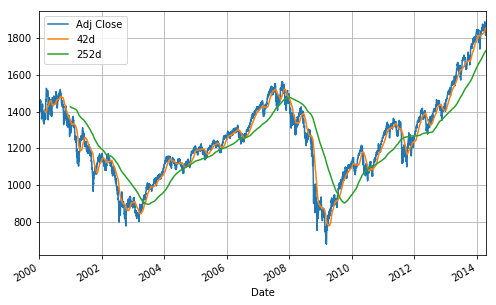

In [ ]:
import datetime 
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2014, 4, 14)
aapl = get('^GSPC', start, end)
aapl['42d'] = aapl['Adj Close'].rolling(window=42).mean()
aapl['252d'] = aapl['Adj Close'].rolling(window=252).mean()
aapl[['Adj Close', '42d', '252d']].plot(grid=True, figsize=(8,5))
aapl['42d-252d'] = aapl['42d']-aapl['252d']

In [ ]:
SD = 50 # signal threshold
aapl['Regime'] = np.where(aapl['42d-252d'] > SD, 1, 0)
aapl['Regime'] = np.where(aapl['42d-252d'] < -SD, -1, aapl['Regime'])
aapl['Regime'].value_counts()

 1    1489
 0    1232
-1     871
Name: Regime, dtype: int64

(-1.1, 1.1)

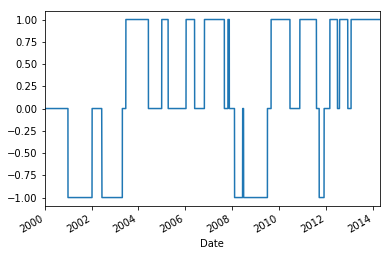

In [ ]:
aapl['Regime'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])

Everything is now available to test the investment strategy based on the signals. We
assume for simplicity that an investor can directly invest in the index or can directly short
the index, which in the real world must be accomplished by using index funds, exchangetraded funds, or futures on the index, for example. Such trades inevitably lead to
transaction costs, which we neglect here. This seems justifiable since we do not plan to
trade “too often.”

Based on the respective regime, the investor either is long or short in the market (index) or
parks his wealth in cash, which does not bear any interest. This simplified strategy allows
us to work with market returns only. The investor makes the market return when he is long
(1), makes the negative market returns when he is short (–1), and makes no returns (0)
when he parks his wealth in cash. We therefore need the returns first. In Python, we have
the following vectorized pandas operation to calculate the log returns. Note that the shift
method shifts a time series by as many index entries as desired — in our case by one
trading day, such that we get daily log returns:


In [ ]:
# Calculate the logarithmic returns of the market
aapl['Market'] = np.log(aapl['Adj Close']/aapl['Adj Close'].shift(1))

,High,Low,Open,Close,Volume,Adj Close,42d,252d,42d-252d,Regime,Market
Date,,,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,NaN,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,NaN,NaN,NaN,0,-0.039099
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,NaN,NaN,NaN,0,0.001920
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,NaN,NaN,NaN,0,0.000955
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,NaN,NaN,NaN,0,0.026730


Recalling how we constructed our regimes, it is now simple to get the returns of the trendbased trading strategy — we just have to multiply our Regime column, shifted by one day,
by the Returns columns (the position is built “yesterday” and yields “today’s” returns):

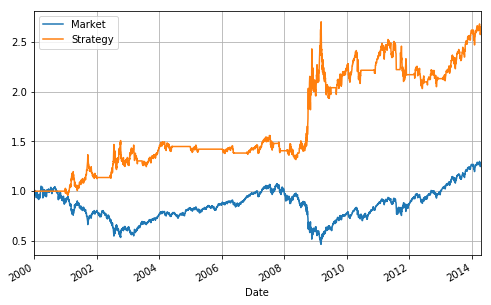

In [ ]:
# Calculate the logarithmic returns of the trend-based trading strategy
aapl['Strategy'] = aapl['Regime'].shift(1) * aapl['Market']
tfrom pandas.util.testing import assert_frame_equal


Figure shows that especially during market downturns (2003 and 2008/2009) the
shorting of the market yields quite high returns. Although the strategy does not capture the
whole upside during bullish periods, the strategy as a whole outperforms the market quite
significantly.

However, we have to keep in mind that we completely neglect operational issues (like
trade execution) and relevant market microstructure elements (e.g., transaction costs). For example, we are working with daily closing values. A question would be when to execute
an exit from the market (from being long to being neutral/in cash): on the same day at the
closing value or the next day at the opening value. Such considerations for sure have an
impact on the performance, but the overall result would probably persist. Also, transaction
costs generally diminish returns, but the trading rule does not generate too many signals.


### Momentum Stocks

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
# Load dataframe consisting of monthly-returns of all S&P 500 stocks

with open("sp500tickers.pickle","rb") as f: tickers = pickle.load(f)
main_df = pd.DataFrame()

for stock in tickers[:10]:
  df = data.DataReader(stock, 'yahoo',start='1/1/2000').filter(['Adj Close'])
  df.rename(columns={'Adj Close':stock}, inplace = True)
  if main_df.empty : main_df = df 
  else : main_df = main_df.join(df, how='outer')
main_df = main_df.pct_change()
main_df.fillna(0, inplace=True)
main_df.to_csv('sp500_joined_closes.csv')
main_df.head()

# Build a portfolio consisting of equally-weighted, top n-stocks every month

# Make column corresponding

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES
Date,,,,,,,,,,
2000-01-03,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2000-01-04,-0.039735,-0.028572,0.0,-0.023973,0.0,-0.030418,-0.083889,-0.056452,0.0,-0.039655
2000-01-05,0.028966,-0.001838,0.0,0.010526,0.0,0.003922,0.019771,0.025641,0.0,0.010772
2000-01-06,0.080429,0.034991,0.0,0.001736,0.0,-0.019531,0.008163,0.066667,0.0,0.007993
2000-01-07,0.019852,0.010676,0.0,-0.005199,0.0,0.027888,0.048583,0.015625,0.0,0.019383


## Mean Reversion

 ### Pairs Trading

 Let's say you have a pair of securities X and Y that have some underlying economic link. An example might be two companies that manufacture the same product, for example Pepsi and Coca Cola. You expect the spread (ratio or difference in prices) between these two to remain constant with time. However, from time to time, there might be a divergence in the spread between these two pairs. The divergence within a pair can be caused by temporary supply/demand changes, large buy/sell orders for one security, reaction for important news about one of the companies, and so on. When there is a temporary divergence between the two securities, i.e. one stock moves up while the other moves down, the pairs trade would be to short the outperforming stock and to long the underperforming one, betting that the "spread" between the two would eventually converge.

Pairs trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement.

In [ ]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib.pyplot as plt

We model X's daily returns by drawing from a normal distribution. Then we perform a cumulative sum to get the value of X on each day. 

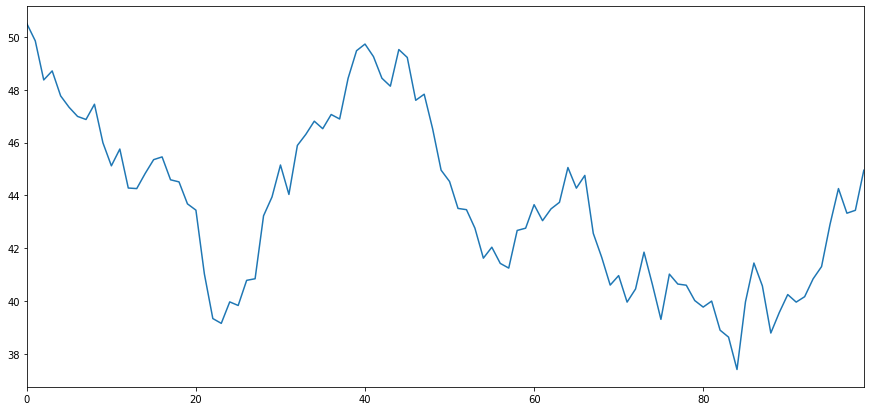

In [ ]:
# Generate the daily returns
Xreturns = np.random.normal(0, 1, 100) 
# sum them and shift all the prices up
X = pd.Series(np.cumsum(Xreturns), name='X') + 50
X.plot(figsize=(15,7))
plt.show()

Now we generate Y. Y is supposed to have a deep economic link to X, so the price of Y should vary pretty similarly. We model this by taking X, shifting it up and adding some random noise drawn from a normal distribution.

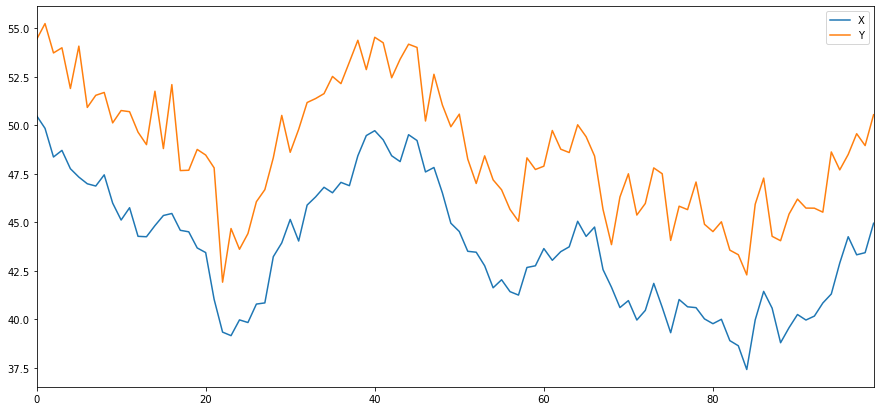

In [ ]:
noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'
pd.concat([X, Y], axis=1).plot(figsize=(15,7))
plt.show()

## Seasonality

# Pricing Models

## Options Pricing Models

### Binomial Model

### Black-Scholes Model

Assumptions

* The option can only be exercised on the expiration date
* Dividends are payed at a continuous rate

Parameters 

* $S$, the spot price of the asset at time $t$
* $T$, the maturity of the option
* $K$, the strike price of the option
* $r$, the risk-free interest rate, assumed to be constant between $t$ and $T$
* $\sigma$, the volatility of the underlying asset, the standard deviation of the asset returns
* $q$, the dividend rate of the asset


Time to maturity is defined as $T - t$

$N(d)$ is the cumulative distribution of the standard normal variable Z, thus

$$ N(d) = \frac{1}{\sqrt2\pi} * \int{e^{-\frac{1}{2}x^2}} dx $$ from -inf to d

The value at time $t$ of a call option is

$$ C(S, t) = S * N(d_1) - K * e^{-r(T-t)} * N(d_2) $$

The value at time $t$ of a put option is 

$$ P(S, t) = K * e^{-r(T-t)} * N(- d_2) - S * N(-d_1) $$

In [ ]:
from sympy import symbols, diff
V, Sig, S, r = symbols('V, Sig, S, r', real = True)
solve(dif(V))

In [ ]:
from scipy import stats
import math

def black_scholes(stock):
  

Options tra